(nm_interpolation_curve_fitting)=
# Interpolation and curve fitting
[<!-- module-nm badge --><span class="module module-nm">Numerical Methods</span>](module-nm) 
```{index} Interpolation and curve fitting
```

Real world environment always generate data, and an important part of a scientist's job is to find patterns in these observations. Python provides several libraries which help to make predictions based on real world data. While Python can make predictions based on existing data point, the human eye is still probably currently the best judge on whether those predictions are sensible or not.

Let's consider a discrete set of data, and let's start with a dataset with 2 dimensions. For example, we could consider the global temperature change over the years. On the x-axis, we could plot the year and on the y-axis, we could plot the temperature. Every year will have a corresponding temperature.

The 1st data point will be data point 0, the 2nd data point will be data point 1, and the 3rd data point will be data point 2, etc. and the last datapoint will be called datapoint \\(N\\). In total, we will have \\(N+1\\) data points. For every data point, there will be a year (\\(x\\) value) and a temperature (\\(y\\) value) assigned.

Since there is an \\(x\\) value and a \\(y\\) value for every data point, we could call the \\(x\\) value of the 1st data point, or data point 0, to be \\(x_0\\), and the \\(y\\) value of the 1st data point, or data point 0, to be \\(y_0\\). We could call the \\(x\\) value of the 2nd data point, or data point 1, to be \\(x_1\\), and the \\(y\\) value of the 2nd data point, or data point 1, to be \\(y_1\\), so on and so forth. We will call the \\(x\\) value of the last data point, or data point \\(N\\), to be \\(x_N\\), and the \\(y\\) value of the last data point, or data point \\(N\\), to be \\(y_N\\).

Therefore, our two dimensional dataset can be described as

\\[ \text{Dataset} = \{ (x_0, y_0),(x_1, y_1),(x_2, y_2),(x_3, y_3), \ldots, (x_N,y_N) \}.\\]

We could define an index \\(i\\), which goes from \\(0\\) to \\(N\\), and describe our dataset as a set of datapoints with their respective \\(x\\) and \\(y\\), which have their index going from \\(0\\) to \\(N\\). Expressed mathematically:

\\[ \text{Dataset} = (x_i, y_i),\quad \text{where} \quad i=0,\ldots,N,\\]

or even simpler

\\[ (x_i, y_i),\quad i=0,\ldots,N,.\\]

## Interpolation vs. curve fitting

The terms curve fitting and interpolation are often used interchangeably, but they are actually very different. In both interpolation and curve fitting, we assume there is some kind of function or relationship between the \\(x\\) value and the \\(y\\) value (and maybe even \\(z\\) if the dataset is 3 dimensional, and even more if the dataset has even more dimensions in machine learning and artificial intelligence). From the limited datapoints that are available, we seek to find the best approximate of this function or relationship.

In our temperature example where we plotted temperature against year, we seek to answer the question if there is a relationship between the temperature and the year. Has the temperature increased through the years, or has it decreased. Maybe the temperature is unrelated to the year? Maybe our data server went up in flames (this apparently happens way more often than you think, that's why invest in a proper [RAID configuration](https://en.wikipedia.org/wiki/Standard_RAID_levels)) and we lost the temperature data for some of the years, could we maybe use the relationship we deduced from the rest of the data points to give an estimate of what the temperature for those years without data to be?

```{admonition} Curve fitting or interpolation?

In both curve fitting and interpolation, you begin with some discrete data points.

With **interpolation**, you seek a function that typically *goes through all of the datapoints*, regardless of what the function will end up looking like. Interpolation is typically used when there is great confidence that there are *no measurement errors* in the data points, and there is *no ambiguity* in mapping \\(x\\) to \\(y\\), meaning that there are no multiple values of \\(y\\) for a single \\(x\\), similar to how mathematical functions are defined.

With **curve fitting**, you simply seek some function that will be a best fit for all the datapoints, and *does not* neccesarily have to *go through all the datapoints*. Curve fitting is typically used when there are *significant error bars* in the data points, and there is *ambiguity* in mapping \\(x\\) to \\(y\\).
```

Although it may seem that interpolation is better than curve fitting since it goes through all the data points, it should be noted that real world data almost always contains some sort of measurement error. Because interpolation tries to fit all the data points, the function produced through interpolation can vary widly even with the slightest change in the data point. Because curve fitting does not seek to fit all the data points, curve fitting functions are less susceptible to drastic changes when there are changes in the data points.

Interpolation has the "inter" word prefix to it, because using the function you got from interpolation, you can make prediction about the \\(y\\) value within the range of the given data points. For example, if I had the temperature data every 5 years since 1990 (1990, 1995, 2000, 2005, 2010, 2015 and 2020), then interpolation would allow me to make prediction about the temperature data in other years within the range of the data points, so from 1990 to 2020, meaning the years 1991, 1992, 1993, 1994, 1996, 1997, 1998, 1999, 2001, 2002, 2003, 2004, 2006, 2007, 2008, 2009, 2011, 2012, 2013, 2014, 2016, 2017, 2018, 2019.

Both interpolation and curve fitting can be done in various different ways. This notebook will introduce some of these ways using NumPy and SciPy libraries:

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

(nm_interpolation)=
## Interpolation
```{index} Interpolation
```
### Mathematical expression

As stated previously, interpolation seeks to find a function that maps \\(x\\) value in the datapoints to the \\(y\\) value in the corresponding datapoints. Therefore, interpolation can be expressed as:

\\[y_i = f(x_i),\quad \forall i, \quad\text{[\\(\forall \equiv\\) "for all"]},\\]

where the function \\(f\\) is called the [interpolant](http://mathworld.wolfram.com/Interpolant.html).

Because it is called interpolation, we can only make predictions for values of \\(x\\) within the range of \\(x_i\\):

\\[ \min(x_i)<x<\max(x_i).\\]

The requirement for distinct \\(x\\) locations means that we have a constraint on the \\(x_i\\)'s which can be written as

\\[x_0 < x_1 < \ldots < x_N.\\]

### Simple example

The simplest form of interpolation is linear interpolation, which is basically joining all the data points together in a line, and then creating a piecewise function.

Suppose we have a set of arbitrary data:

\\[\text{Dataset} = \{ (0.5, 0.5), (2.0, 0.4), (4.0, 0.3), (5.0, 0.1), (7.0, 0.9), (9.0, 0.8) \}.\\]

The \\(x\\) values and \\(y\\) values of the dataset are
\\[\text{Dataset x-values} = \{ 0.5, 2.0, 4.0, 5.0, 7.0, 9.0 \},\\\\\\
\text{Dataset y-values} = \{ 0.5, 0.4, 0.3, 0.1, 0.9, 0.8 \}.\\]

For linear piecewise interpolation, we begin with the first 2 points in the dataset, and then the next 2 points, and the next 2 points and so on and so forth. For the first 2 points, we find a linear equation that is determined by these two points. Linear equations are expressed as:

\\[y = mx + c,\\]

where \\(m\\) is the gradient, \\(c\\) is the \\(y\\)-intercept, and \\(m\\) and \\(c\\) can be found by

\\[m = \frac{y_2 - y_1}{x_2 - x_1},\\\\\\
c = y_1 - mx_1 \text{ or } c = y_2 - mx_2.\\]

For the first 2 points \\((0.5, 0.5)\\) and \\((2.0, 0.4)\\)  we obtain \\(m = -\frac{1}{15}\\) and \\(c =\frac{8}{15}\\).

For the range \\(0.5<x<2.0\\), the function can be written as

\\[f(x) = -\frac{1}{15}x + \frac{8}{15},\quad 0.5<x<2.0.\\]

For the next 2 points \\((2.0, 0.4)\\) and \\((4.0, 0.3)\\) we do the same, and we obtain \\(m = -\frac{1}{20}\\) and \\(c =\frac{1}{2}\\).

For the range \\(2.0<x<4.0\\), the function can be written as

\\[f(x) = -\frac{1}{20}x + \frac{1}{2},\quad 2.0<x<4.0.\\]

We can combine the two partial functions above, and obtain

$$
  f(x) =
  \left\{\begin{array}
    -\frac{1}{15}x + \frac{8}{15}, \quad 0.5<x<2.0 \\
    -\frac{1}{20}x + \frac{1}{2}, \quad 2.0<x<4.0
  \end{array}\right\}.
$$

We can continue the above process for the next 2 points, and the next 2 points, and eventually we will get a piecewise linear function:

$$
  f(x) =
  \left\{\begin{array}
    -\frac{1}{15}x + \frac{8}{15},\quad 0.5<x<2.0 \\
    -\frac{1}{20}x + \frac{1}{2},\quad 2.0<x<4.0 \\
    \quad\quad\cdots
  \end{array}\right\}.
$$

We can write our own code to obtain coefficients \\(m\\) and \\(c\\) for the points given in the dataset above:

In [3]:
x = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
y = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])

m_list = np.zeros(len(x))
c_list = np.zeros(len(x))

for i in range(len(x)-1):
    
    m = (y[i+1]-y[i])/(x[i+1]-x[i])
    c1 = (y[i]-m*x[i])
    c2 = (y[i+1]-m*x[i+1])

    print("For (%.1f, %.1f) and (%.1f, %.1f), m = %.2f and c1 = %.2f, c2 = %.2f."
             % (x[i], y[i], x[i+1], y[i+1], m, c1, c2))
    
    m_list[i] = m
    c_list[i] = c1

For (0.5, 0.5) and (2.0, 0.4), m = -0.07 and c1 = 0.53, c2 = 0.53.
For (2.0, 0.4) and (4.0, 0.3), m = -0.05 and c1 = 0.50, c2 = 0.50.
For (4.0, 0.3) and (5.0, 0.1), m = -0.20 and c1 = 1.10, c2 = 1.10.
For (5.0, 0.1) and (7.0, 0.9), m = 0.40 and c1 = -1.90, c2 = -1.90.
For (7.0, 0.9) and (9.0, 0.8), m = -0.05 and c1 = 1.25, c2 = 1.25.


Piecewise linear interpolation can be easily done in Python. First, let's begin with plotting the points on their own. Python will automatically join the points together with lines unless otherwise specified. The `"o"` was used in the `plt.plot()` to ensure that bullets were shown instead of lines.

In [4]:
# We will want to overlay a plot of the raw data a few times below so 
# let's do this via a function that we can call repeatedly
def plot_raw_data(x, y, ax):
    """plot x vs y on axes ax, 
    add axes labels and turn on grid
    """
    ax.plot(x, y, 'ko', label='raw data')
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.grid(True)

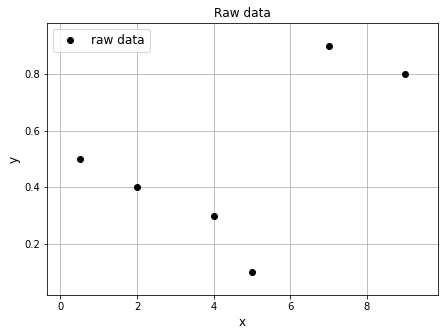

In [5]:
# Set up a figure
fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# Overlay raw data
plot_raw_data(x, y, ax1)

# Add a legend
ax1.legend(loc='best', fontsize=12)

# Add a figure title
ax1.set_title('Raw data', fontsize=12)

plt.show()

Now, let's plot the piecewise linear function. We will use the function from above, so be sure to run the cell above so that the function is loaded.

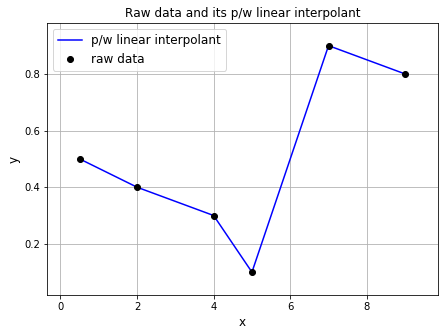

In [6]:
fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# Plot a piecewise-linear approximation.
# We get this simply by connecting the points with straight lines
# and this is the default behaviour of the plotting routine
ax1.plot(x, y, 'b', label='p/w linear interpolant')

# The previous raw data is overlain using the previous function
plot_raw_data(x, y, ax1)

# Add a legend
ax1.legend(loc='best', fontsize=12)

# Add a figure title
ax1.set_title('Raw data and its p/w linear interpolant', fontsize=12)

plt.show()

## Polynomial interpolation

Suppose we are given a set of \\(N+1\\) data points \\((x_i, y_i)\\) (with distinct \\(x_i\\)'s).

Now suppose we construct a polynomial of degree \\(N\\):
\\[ P_N(x) = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \ldots a_N x^N,\\]
where \\(a_0, \, a_1, \, \ldots, \, a_N\\) are the coefficients of our polynomial.

Note that there are \\(N+1\\) of these coefficients available to us with a degree \\(N\\) polynomial. This number of free parameters (\\(N+1\\)) agreeing exactly with the number of data points (\\(N+1\\)) is important as it's exactly the right number to allow us to determine the coefficients uniquely - essentially when we substitute in our data we can write this information as a linear matrix system we can invert (as its square system) for the coefficients.

We recognise this \\(P_N\\\) as the simple expression for a polynomial we have probably been introduced to before.

### How this problem leads to a square matrix system?

Assume we have two pieces of information and want to fit a linear line - let's write these out:

\\[ y_0 = a_0 + a_1x_0,\\\\\\
y_1 = a_0 + a_1x_1. \\]

We are assuming we know the \\(x\\)'s and the \\(y\\)'s, and we want to find the \\(a\\)'s.

There are multiple ways we could solve this, one way is to think about how you solve simultaneous equations - e.g. rearrange the second equation to give an expression for \\(a_1\\) in terms of \\(a_0\\), and so on.

However this isn't easy to do with large amounts of data. Instead we can note that this is equivalent to forming and solving the linear system

\begin{equation}
\begin{pmatrix}
1 & x_0  \\\\\\
1 & x_1 
\end{pmatrix}
\begin{pmatrix}
a_0\\\\\\
a_1
\end{pmatrix}=
\begin{pmatrix}
y_0\\\\\\
y_1
\end{pmatrix}.
\end{equation}

Note that we can also interpret this as a linear combination of a *basis* made up of single-term polynomials:

\\[1,\ x,\ x^2,\ \ldots,\ x^N.\\]
These single term polynomials are also referred to as monomials. Our linear example from earlier is an example of this with two free parameters.

While this is perhaps the simplest (it's consistent with the simplest definition of a polynomial we are used to seeing) and the most obvious way to proceed, we should ask ourselves can we do better? Can we try to use a different (less obvious) basis that might mean we don't have a (potentially large, and difficult) matrix system to solve for the coefficients?

## Lagrange polynomial
The answer is yes, and [Lagrange polynomials](https://mathworld.wolfram.com/LagrangeInterpolatingPolynomial.html) are a particularly popular choice for constructing an interpolant for a given data set.

```{margin} Note

Note that this is not a typo and we are not re-using notation here - we will see that the weights in this approach actually are the same as the \\(y_i\\)'s making up the data we are interpolating!

```
Given a set of \\((N+1)\\) points as above, the Lagrange polynomial is defined as the linear combination

\\[L(x) = \sum_{i=0}^{N} y_i \ell_i(x),\\]
where the \\(\ell_i(x)\\) are a new choice for our basis functions (different to the monomials, but the same idea in that they form a basis), and the \\(y_i\\) are the \\(N+1\\) weights/coefficients corresponding to this basis.

The whole point of this approach is that we no longer have to compute the weights by inverting a matrix system as we had to above with monomials.

Now, by construction in this approach, we know the weights directly from the given data.

The functions \\(\ell_i(x)\\) are known as the Lagrange basis polynomials and are defined by the product

\\[\ell_i(x) := \prod_{\begin{smallmatrix}0\le m\le N\\ m\neq i\end{smallmatrix}} \frac{x-x_m}{x_i-x_m} = \frac{(x-x_0)}{(x_i-x_0)} \cdots \frac{(x-x_{i-1})}{(x_i-x_{i-1})} \frac{(x-x_{i+1})}{(x_i-x_{i+1})} \cdots \frac{(x-x_N)}{(x_i-x_N)},\\]
where \\(0\le i\le N\\).

If \\(N=0\\) (i.e. if there is only one point in the data set), there is only one Lagrange basis polynomial defined by convention as \\(\ell_0=1\\).

Notice from the definition of these basis functions the clear requirement that no two \\(x_i\\) are the same, \\(x_i - x_m \neq 0\\), so this expression is always well-defined (i.e. we never get a divide by zero!).

The reason pairs \\(x_i = x_j\\) with \\(y_i\neq y_j\\) are not allowed is that no interpolation function \\(L\\) such that \\(y_i = L(x_i)\\) would exist; a function can only return a single unique value for each argument \\(x_i\\) (this uniqueness is part of the definition of a function).

On the other hand, if also \\(y_i = y_j\\), then those two points would actually be one single point - we would thus have redundant data and really we could throw one away and would be looking for a degree \\(N-1\\) degree to interpolate \\(N\\) distinct data points.

For all \\(j\neq i\\), \\(\ell_j(x)\\) includes the term \\((x-x_i)\\) in the numerator (the thing on the top), so the whole product will be zero when evaluated at \\(x=x_i\\):

\\[\ell_{j\ne i}(x_i) =
\prod_{\begin{smallmatrix}0\le m\le N\\ m\neq j\end{smallmatrix}}
 \frac{x_i-x_m}{x_j-x_m} = \frac{(x_i-x_0)}{(x_j-x_0)} \cdots \frac{(x_i-x_i)}{(x_j-x_i)} \cdots \frac{(x_i-x_N)}{(x_j-x_N)} = 0.\\]

On the other hand a basis function \\(i\\) evaluated at location \\(x_i\\) returns 1:

\\[\ell_i(x_i) = 
\prod_{\begin{smallmatrix}0\le m\le N\\ m\neq i\end{smallmatrix}}
\frac{x_i-x_m}{x_i-x_m} = 1.\\]

In other words, all of the basis functions/polynomials are zero at the exact locations of the data (\\(x=x_i\\)), except for \\(\ell_i(x)\\), for which it holds that \\(\ell_i(x_i)=1\\), because it lacks the \\((x-x_i)\\) term in the product.

It follows that

\\[y_i \ell_i(x_i)=y_i,\\]

and therefore at each point \\(x_i\\)

\\[L(x_i)=0+0+\dots + y_i + 0 +\ldots +0=y_i,\\]

showing that \\(L\\) does indeed interpolate (i.e. pass through) the data points exactly.

To help illustrate our discussion lets go back to our simple example from earlier. Note that we can use SciPy to evaluate the individual Lagrange basis function and polynomial.

For example, we can use [`scipy.interpolate.lagrange`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html) to generate the Lagrange polynomial for a dataset as shown in the next cell.

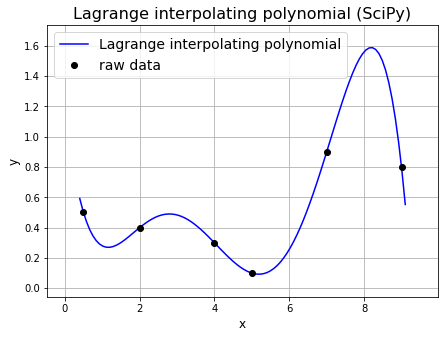

In [10]:
import scipy.interpolate as si

### Our raw data from earlier - you can also test on our three data point example
xi = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
yi = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])

# Create the Lagrange polynomial for the given points.
lp = si.lagrange(xi, yi)
# above we executed 'import scipy.interpolate as si'
# and so this line is calling the 'lagrange' function from the 
# 'interpolate' sub-package within scipy.

# Evaluate this function at a high resolution (100 points here) so that 
# we get a smooth well-resolved line when we plot our polynomial
x = np.linspace(0.4, 9.1, 100)

# set up the figure
fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# Actually plot (x,y)=(x,lp(x)) on the axes with the label ax1
ax1.plot(x, lp(x), 'b', label='Lagrange interpolating polynomial')

# Overlay raw data on the same axes
plot_raw_data(xi, yi, ax1)
ax1.set_title('Lagrange interpolating polynomial (SciPy)', fontsize=16)

# Add a legend
ax1.legend(loc='best', fontsize=14)

plt.show()

### Error in Lagrange interpolation

Note that it can be proven that in the case where we are interpolating a known function (e.g. a complicated non-polynomial function such as \\(\exp\\) or \\(\sin\\)) by a simpler polynomial, the error at any point we evaluate the interpolant at is proportional to:

- the distance of that point from any of the data points (which makes sense as the error is obviously zero at the data points),
- and to the \\((N+1)\\)-th derivative of that function evaluated at some location within the bounds of the data, i.e. the more complicated (sharply varying) the function is, the higher the error could be.

This result is sometimes called the [Lagrange remainder theorem](https://en.wikipedia.org/wiki/Polynomial_interpolation#Interpolation_error).


### Exercise

We will sample the function \\(y(x)=x^3\\) at the points \\(x=(1,2,3)\\) and construct Lagrange polynomials - \\(L_0\\) (the constant interpolant going through the \\(x=2\\) data point only), \\(L_1\\) (the linear interpolant going through the \\(x=1\\) and \\(x=3\\) points) and \\(L_2\\) (the quadratic interpolant going through all three points).

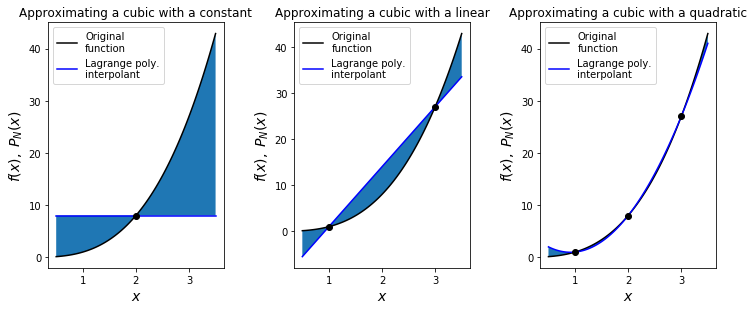

In [15]:
# this is the function we are going to approximate with low degree polynomials
def func_x3(x):
    return x**3

# as we will plot our approximation several times let's write a small function to do this
def plot_approximation(f, xi, ax):
    # Relatively fine x points for plotting our functions
    x = np.linspace(0.5, 3.5, 100)
    # Plot the original function
    ax.plot(x, f(x), 'k', label = 'Original\nfunction')

    # construct and plot the Lagrange polynomial
    lp = si.lagrange(xi, f(xi))
    # evaluate and plot the Lagrange polynomial at the x points
    ax.plot(x, lp(x), 'b', label = 'Lagrange poly.\ninterpolant')

    # shade the region between the two to emphasise the difference
    ax.fill_between(x, f(x), lp(x))
    
    # add some axis labels
    ax.set_xlabel('$x$', fontsize=14)
    ax.set_ylabel('$f(x), \; P_N(x)$', fontsize=14)

    # and add on top the interpolation points
    ax.plot(xi, f(xi), 'ko')
    
    # and a legend
    ax.legend(loc='best', fontsize=10)


# set up our figs for plotting - we want three subplots arranged in a 1x3 grid
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4))
# add some padding otherwise axes the labels can overlap with the next subplot
fig.tight_layout(w_pad=4) 

# L0
plot_approximation(func_x3, np.array([2., ]), ax1)
ax1.set_title('Approximating a cubic with a constant', fontsize=12)

# L1
plot_approximation(func_x3, np.array([1., 3.]), ax2)
ax2.set_title('Approximating a cubic with a linear', fontsize=12)

# L2
plot_approximation(func_x3, np.array([1., 2., 3.]), ax3)
ax3.set_title('Approximating a cubic with a quadratic', fontsize=12)

plt.show()

## Newton polynomial
Calculating the Newton polynomial (also called [Newton's divided difference interpolation polynomial](https://mathworld.wolfram.com/NewtonsDividedDifferenceInterpolationFormula.html)) yields the same polynomial as the Lagrange polynomial method (remember that the polynomial of minimum degree to pass through each data point is unique), but is arguably easier to implement.

To derive this approach we write our degree \\(N\\) polynomial in the following form

\\[ P_N(x) = a_0 +(x-x_0)a_1 + (x-x_0)(x-x_1)a_2 + \cdots + (x-x_0)(x-x_1)\ldots(x-x_N)a_N,\\]
where \\\(a_0, a_1, \ldots, a_N\\_ are our \\(N+1\\) free parameters we need to find using the \\(N+1\\) pieces of information we have in the given data.

Efficient derivation of an algorithm to compute the Newton polynomial follows from noticing that we can write this polynomial in a [recursive form](https://en.wikipedia.org/wiki/Recursion_(computer_science)).

Consider for example a case with $N=3$:

\\[P_3(x) = a_0 +(x-x_0)a_1 + (x-x_0)(x-x_1)a_2 + (x-x_0)(x-x_1)(x-x_2)a_3,\\\\\\
P_3(x)= a_0 +(x-x_0)[a_1 + (x-x_1)[a_2 + (x-x_2)a_3]].\\]

Notice that substituting in the \\(x_i\\) values leads to a set of simultaneous equations where we can easily evaluate the unknowns \\(a_0, a_1, \ldots\\) using 'back (or forward) substitution'.

1. Substitute \\(x=x_0\\): We have \\(a_0 = P_3(x_0)\\), and we know that our interpolant \\(P_3(x)\\) evaluated at \\(x_0\\) must return \\(y_0\\). Hence,
    \\[a_0 = y_0.\\]
2. Now substitute \\(x=x_1\\). We have \\(P_3(x_1) = a_0 +(x_1-x_0)a_1 = y_0 +(x_1-x_0)a_1\\), the LHS of this is \\(y_1\\), and we know everything on the RHS as we have already calculated \\(a_0 = y_0\\). We can thus trivially rearrange to yield
    \\[ a_1 = \frac{(y_1 - y_0)}{(x_1-x_0)}.\\]
2. Substituting \\(x=x_2\\) yields
    \\[y_2 = P_3(x_2) = a_0 +(x_2-x_0)[a_1 + (x_2-x_1)a_2] = y_0 + (x_2-x_0)\left[ \frac{(y_1 - y_0)}{(x_1-x_0)} + (x_2-x_1)a_2\right],\\\\\\
\implies a_2 = \frac{ \frac{(y_2 - y_0)}{(x_2-x_0)} - \frac{(y_1 - y_0)}{(x_1-x_0)}}{x_2-x_1}.\\]

3. And so on.

To define an algorithm for this method in general let's first introducing the following [divided difference notation](https://en.wikipedia.org/wiki/Divided_differences):

\\[ \Delta y_i = \frac{y_i-y_0}{x_i-x_0},\quad i=1,2,\ldots, N,\\\\\\
\Delta^2 y_i = \frac{\Delta y_i-\Delta y_1}{x_i-x_1},\quad i=2, 3,\ldots, N,\\\\\\
\vdots\\\\\\
\Delta^N y_N = \frac{\Delta^{N-1} y_N-\Delta^{N-1} y_{N-1}}{x_N-x_{N-1}}.\\]

With a bit of thought we can hopefully see from the above example that the coefficients of the interpolating polynomial in the general case are given by

\\[a_0=y_0,\quad a_1 = \Delta y_1, \quad a_2 = \Delta^2 y_2, \quad \ldots \quad a_N = \Delta^N y_N.\\]

Our own code below shows how to calculate Newton polynomial coefficients.

In [16]:
# Consider the above example data again
xi = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
yi = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])


def calculate_newton_poly_coeffs(xi, yi):
    """ Evaluate the coefficients a_i recursively using Newton's method
    """
    # Initialise the array 'a' with yi, but take a copy to ensure we don't
    # overwrite our yi data!
    a = yi.copy()

    # We have N+1 data points, and so
    N = len(a) - 1

    # for each k, we compute Δ^k y_i from the a_i = Δ^(k-1) y_i of the previous iteration:
    for k in range(1, N+1):
        # but only for i>=k
        for i in range(k, N+1):
            a[i] = (a[i] - a[k-1])/(xi[i]-xi[k-1])

    return a


# Given the coefficients a, and the data locations xi,
# define a function to evaluate the Newton polynomial
# at locations given in the array x.
# NB. this is just an evaluation of the P_n(x) = ... formula
# given at the start of this section.

def eval_newton_poly(a, xi, x):
    """ Function to evaluate the Newton polynomial
    at x, given the data point xi and the polynomial coeffs a
    """
    N = len(xi) - 1  # polynomial degree
    # recursively build up polynomial evaluated at x
    P = a[N]
    for k in range(1, N+1):
        P = a[N-k] + (x - xi[N-k])*P
    return P

And now we can plot the result:

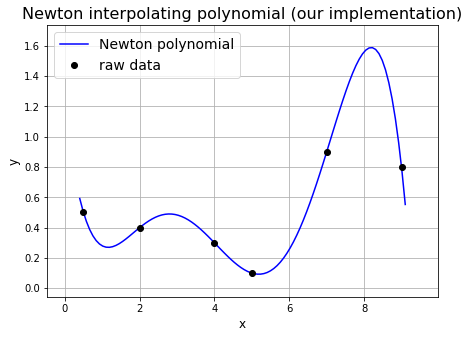

In [19]:
# set up figure
fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(111)

# add a small margin 
ax1.margins(0.1)

# Evaluate the coefficients of the Newton polynomial
a = calculate_newton_poly_coeffs(xi, yi)
# Evaluate the polynomial at high resolution and plot
x = np.linspace(0.4, 9.1, 100)
ax1.plot(x, eval_newton_poly(a, xi, x), 'b', label='Newton polynomial')

# Overlay raw data
plot_raw_data(xi, yi, ax1)
ax1.set_title('Newton interpolating polynomial (our implementation)', fontsize=16)

# Add a legend
ax1.legend(loc='best', fontsize=14)

plt.show()

(nm_curve_fitting)=
## Curve fitting
```{index} Curve fitting
```

```{margin} Linear regression
Note that curve fitting is related to the topic of {ref}`regression analysis <linear_regress>`. [Least squares approximation](https://en.wikipedia.org/wiki/Least_squares) used in linear regression is a method of minimising the sum of the squares of the differences between the prediction and real data. Fitting a polynomial to data in a least squares sense is an example of what can be termed polynomial regression.
```

In [curve fitting](https://en.wikipedia.org/wiki/Curve_fitting), we want to find a function that approximates the data in some sense, but does not go through all the point. In this case we no longer have the requirement that

\\[x_0 < x_1 < \ldots < x_N,\\]

and can consider the data simply as a cloud of points.

This is the most typical case for real world data which contains variability and noise and could additionally give rise to multiple different measurements (i.e. \\(y\\) values) at the same \\(x\\) location. With real data this fitting of data to a function often has the effect of smoothing complex or noisy data.

### Polynomial curve fitting

Imagine having several points on a graph, and you want a curve that could go through all these points. The curve could be described through a mathematical function that could create a curve. Remember that straight lines could be considered a special case of a curve, much like how in topology, the square is a special case of a rectangle, and a rectangle is a special case of a parallelogram, and parallelogram a special case of a quadrilateral. One of the mathematical function that could create curves is a polynominal function.

A first degree polynomial function is basically a straight line, and is written in the form of:
\\[ y = mx + c.\\]

A second degree polynominal function is basically a curve with a single bend, and is written in the form of:
\\[ y = ax^2 + bx + c.\\]

A 3 degree polynominal function is a curve with two bends, and is written in the form of:
\\[ y = ax^3 + bx^2 + cx + d.\\]

Thus, a polynominal function of \\(n\\) degree is a curve with \\(n-1\\) bends.

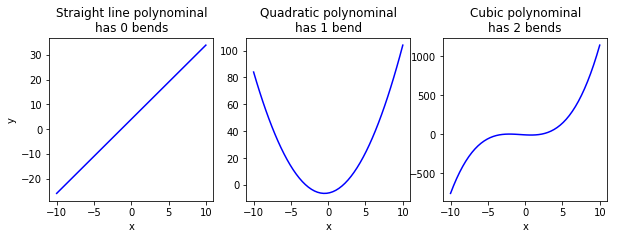

In [20]:
# A snippet to showing polynominal degree and number of bends

def poly_plot(xmin, xmax, number_of_points, a, b, c, d, ax):
    xi = np.linspace(xmin, xmax)
    yi = a*xi**3 + b*xi**2 + c*xi + d
    ax.plot(xi, yi, color="blue")
    ax.set_xlabel("x")
    
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
ax1 = axes[0] 
ax2 = axes[1]
ax3 = axes[2]

poly_plot(-10, 10, 100, 0, 0, 3, 4, ax1)
ax1.set_title("Straight line polynominal\nhas 0 bends")

poly_plot(-10, 10, 100, 0, 1, 1, -6, ax2)
ax2.set_title("Quadratic polynominal\nhas 1 bend")

poly_plot(-10, 10, 100, 1, 2, -5, -6, ax3)
ax3.set_title("Cubic polynominal\nhas 2 bends")

ax1.set_ylabel("y")

plt.show()

### Simple example

While we could just use the default plotting method to demonstrate linear interpolation, to demonstrate linear curve-fitting we need to do a bit more work.

The example below demonstrates how we can use `numpy.polyfit` to do this for us. The documentation can be found [here](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html).

```python
numpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
```
```{admonition} Least squares polynomial fit

Fit a polynomial p(x) = p[0] * x**deg + ... + p[deg] of degree deg to points (x, y). Returns a vector of coefficients p that minimises the squared error in the order deg, deg-1, … 0.
```

`numpy.polyfit` returns the coefficients of the polynomial fit to the data. We can then use `numpy.poly1d` to turn this into a function we can easily evaluate, as seen in the next example.

In [8]:
# Fit a polynomial of degree 1, i.e. a straight line, to our (x, y) data from above
degree = 1
poly_coeffs = np.polyfit(x, y, degree)
print('poly_coeffs: ',poly_coeffs)

# Use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(poly_coeffs)

poly_coeffs:  [0.0508044  0.26714649]


We can plot the raw data and the linear fit:

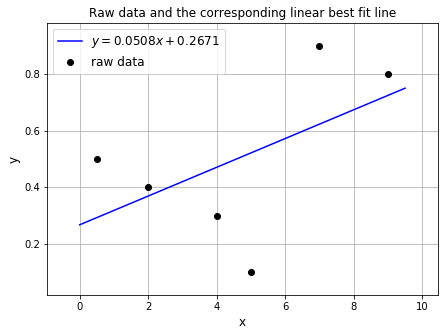

In [9]:
# Set up figure
fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# Plot the linear fit - define 100 evenly spaced points (x) covering our
# x extent and plot our linear polynomial evaluated at these points (p1(x))
# of course 100 is overkill for this linear example
xx = np.linspace(0., 9.5, 100)
ax1.plot(xx, p1(xx), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(poly_coeffs[0], 
                                                                 poly_coeffs[1]))

# Overlay raw data
plot_raw_data(x, y, ax1)

# Add a legend
ax1.legend(loc='best', fontsize=12)

# Add a figure title
ax1.set_title('Raw data and the corresponding linear best fit line', fontsize=12)

plt.show()

A curve that goes through multiple points will have to bend and twist itself so that it goes through these points. Therefore, a curve with a higher polynominal degree, and thus a larger number of bends, will be able to bend and twist itself to better fit the points.

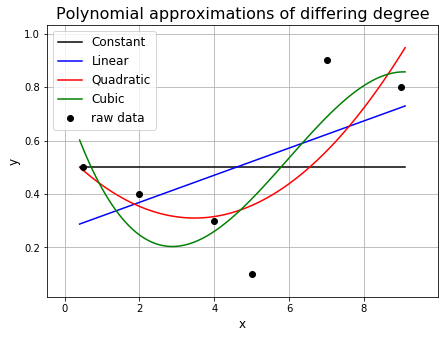

In [22]:
# Consider the above example data again
xi = np.array([0.5,2.0,4.0,5.0,7.0,9.0])
yi = np.array([0.5,0.4,0.3,0.1,0.9,0.8])

# Calculate coefficients of polynomial degree 0 - ie a constant value.
poly_coeffs=np.polyfit(xi, yi, 0)

# Construct a polynomial function which we can use to evaluate for arbitrary x values.
p0 = np.poly1d(poly_coeffs)

# Fit a polynomial degree 1 - ie a straight line.
poly_coeffs=np.polyfit(xi, yi, 1)
p1 = np.poly1d(poly_coeffs)

# Quadratic
poly_coeffs=np.polyfit(xi, yi, 2)
p2 = np.poly1d(poly_coeffs)

# Cubic
poly_coeffs=np.polyfit(xi, yi, 3)
p3 = np.poly1d(poly_coeffs)

# Set up figure
fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

x = np.linspace(0.4, 9.1, 100)

ax1.plot(x, p0(x), 'k', label='Constant')
ax1.plot(x, p1(x), 'b', label='Linear')
ax1.plot(x, p2(x), 'r', label='Quadratic')
ax1.plot(x, p3(x), 'g', label='Cubic')

# Overlay raw data
plot_raw_data(xi, yi, ax1)

ax1.legend(loc='best', fontsize = 12)
ax1.set_title('Polynomial approximations of differing degree', fontsize=16)

plt.show()

### Squared error calculation

As described in the docs ([`numpy.polyfit`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html)), least squares fitting minimises the sum of the squares of the differences between the data provided and the polynomial approximation, i.e. it minimises the expression

\\[E = \sum_{i=0}^{N} (P(x_i) - y_i)^2,\\]

where \\(P(x_i)\\) is the value of the polynomial function that has been fit to the data evaluated at point \\(x_i\\), and \\(y_i\\) is the \\(i^{th}\\) data value.

<p style="text-align:center;"><img src="https://upload.wikimedia.org/wikipedia/commons/b/b0/Linear_least_squares_example2.svg" width="300px"></p>

Source: [Wikipedia](https://en.wikipedia.org/wiki/Linear_least_squares)

Let's write a function that evualuates the squared error and use it to evaluate error for each of the polynomials calculated above.

In [24]:
# We use the square of the difference to ensure each contribution
# to the total error is positive, otherwise errors of different signs
# could/would cancel out giving a false estimate of how good our approximation is


def sqr_error(p, xi, yi):
    """"function to evaluate the sum of square of errors"""
    # first compute the square of the differences
    diff2 = (p(xi)-yi)**2
    # and return their sum
    return diff2.sum()


print("Constant fit error = ", sqr_error(p0, xi, yi))
print("Linear fit error = ", sqr_error(p1, xi, yi))
print("Quadratic fit error = ", sqr_error(p2, xi, yi))
print("Cubic fit error = ", sqr_error(p3, xi, yi))

Constant fit error =  0.4600000000000001
Linear fit error =  0.3329889923793396
Quadratic fit error =  0.1994782421425494
Cubic fit error =  0.1573034366232376


(nm_extrapolation)=
## Extrapolation

Interpolation by definition is used to estimate \\(y\\) for values of \\(x\\) within the bounds of the available data (here \\([0.5,9]\\)) with some confidence. **Extrapolation** on the other hand is the process of estimating (e.g. using the interpolating function) \\(y\\) outside the bounds of the available data. However, extrapolation requires a great deal of care as it will become increasingly inaccurate as you go further out of bounds.

We can recreate the plots for different degrees of polynomial, setting x-range from -2 to 11.0 to see how extrapolation changes the result.

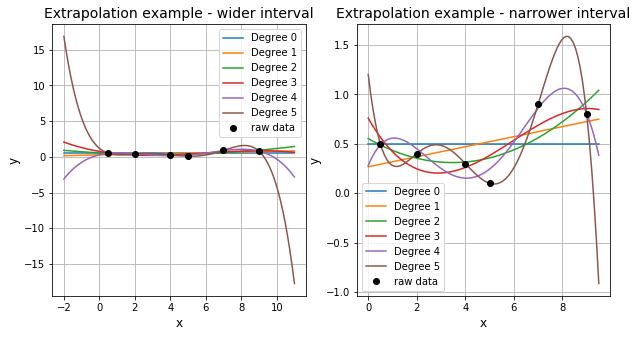

In [27]:
# Xonsider the above example data again
xi = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
yi = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])

# Let's set up some space to store all the polynomial coefficients
# there are some redundancies here, and we have assumed we will only 
# consider polynomials up to degree N
N = 6
poly_coeffs = np.zeros((N, N))

for i in range(N):
    poly_coeffs[i, :(i+1)] = np.polyfit(xi, yi, i)

# Plot over a couple of different x ranges
x1 = np.linspace(-2., 11., 100)
x2 = np.linspace(0., 9.5, 100)

# Set up figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

for i in range(N):
    p = np.poly1d(poly_coeffs[i, :(i+1)])
    ax1.plot(x1, p(x1), label='Degree %i' % i)

# Overlay raw data
plot_raw_data(xi, yi, ax1)
# Add a legend
ax1.legend(loc='best')
ax1.set_title('Extrapolation example - wider interval', fontsize=14)

# NB. if you set the limits of the x data to numpy.linspace(0., 9.5, 100)
# and replot this will result in you zooming in on the data to better see
# how each polynomial fits the data, but less clearly shows the major
# problem with extrapolation.

for i in range(N):
    p = np.poly1d(poly_coeffs[i, :(i+1)])
    ax2.plot(x2, p(x2), label='Degree %i' % i)

# Overlay raw data
plot_raw_data(xi, yi, ax2)
# Add a legend
ax2.legend(loc='best')
ax2.set_title('Extrapolation example - narrower interval', fontsize=14)

plt.show()